<a href="https://colab.research.google.com/github/amura/capmpricing/blob/main/Capital_Asset_Pricing_Model_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Accessing daily prices 

In [ ]:
%%capture
!pip install pandas-datareader
!pip3 install yfinance

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [12]:
from pandas_datareader import data
import pandas as pd

In [14]:

# Apple, Intel, Microsoft, IBM, and S&P-500 for the period of 01/01/2021-04/01/2021
startDt = '2021-01-01'
endDt = '2021-04-01'
def getHistoricalPrices(shares):
  # panel_data = data.DataReader(shares, 'yahoo', startDt, endDt)
  # return panel_data
  import yfinance as yf  
  start = datetime.datetime(2020,1,1)
  end = datetime.datetime(2021,4,1)
  SP = yf.download(shares,start=start,end = end, interval='1d')
  return SP



In [15]:
historical_data = getHistoricalPrices(['AAPL','INTC','MSFT','IBM','^GSPC'])
print(historical_data)

print(historical_data.shape)



[*********************100%***********************]  5 of 5 completed
             Adj Close                         ...    Volume                      
                  AAPL         IBM       INTC  ...      INTC      MSFT       ^GSPC
Date                                           ...                                
2020-01-02   74.207466  125.572166  58.644547  ...  18056000  22622100  3458250000
2020-01-03   73.486023  124.570686  57.931248  ...  15293900  21116200  3461290000
2020-01-06   74.071579  124.348145  57.767384  ...  17755200  20813700  3674070000
2020-01-07   73.723213  124.431610  56.803471  ...  21876100  21634100  3420380000
2020-01-08   74.909149  125.470146  56.842022  ...  23133500  27746500  3720890000
...                ...         ...        ...  ...       ...       ...         ...
2021-03-25  120.385513  131.599625  61.640350  ...  35401400  34061900  4940800000
2021-03-26  121.004463  134.873047  64.472908  ...  34705800  25479900  5467850000
2021-03-29  121.18

### Accessing risk free rate

Extract risk-free rate using FRED (Federal Reserve Economic Data) API for the period of 01/01/2021-04/01/2021 via yahoo finance API.

In [1]:
%%capture
!pip3 install fredapi


In [3]:
from fredapi import Fred
fred = Fred(api_key='e646ec454433af4d2d7d3a8b77b5cad3')

riskFreeRate = fred.get_series('DGS3MO', observation_start='01/01/2021', observation_end='04/01/2021')
print(riskFreeRate)

2021-01-01     NaN
2021-01-04    0.09
2021-01-05    0.09
2021-01-06    0.09
2021-01-07    0.09
              ... 
2021-03-26    0.02
2021-03-29    0.03
2021-03-30    0.02
2021-03-31    0.03
2021-04-01    0.02
Length: 65, dtype: float64


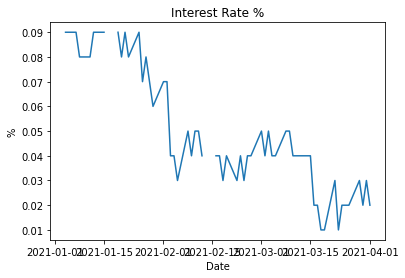

In [6]:
from matplotlib import  pyplot as plt
plt.plot(riskFreeRate)

plt.title('Interest Rate %')
plt.ylabel('%')
plt.xlabel('Date')
plt.show()